## <font color='Orange'>Introduction </font>
### <font color='Dark Orange'> Hi everyone. This notebook is a beginners guide to <i> "The American Presidency"</i> Dataset.<br>It contains some insites that about the dataset and what all could be done with it. <br>Hope you would enjoy using it. <u><b> Please do comment about the dataset as it is my first time uploading/sharing one. </b></u></font> 

### <font color='Blue'>Do UpVote the Dataset.Thank You🙏😃. </font>
### Link- https://www.kaggle.com/achintyatripathi/american-elections 

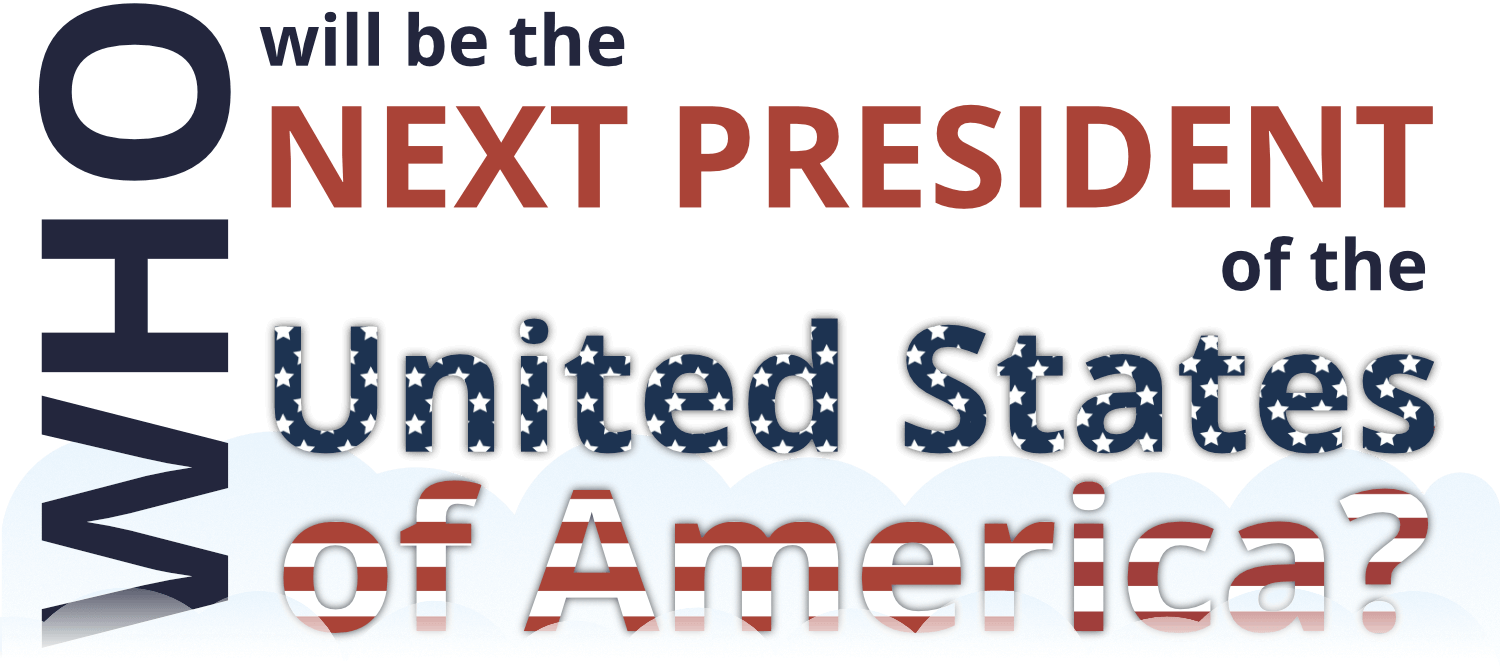

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
# Ploting and visualisations 
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px 
from plotly.offline import download_plotlyjs,init_notebook_mode, iplot
import plotly.tools as tls 
import plotly.figure_factory as ff 
py.init_notebook_mode(connected=True)
# ----------------------- #

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# elections.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/elections.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'elections.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

In [ ]:
display(df1.head(5),df1.tail(5))

## So you can see that the dataset has data from 1934 Franklin D. Roosevelt to 2018	Donald J. Trump.
## Also note:- Year 1934,1938 were the forming years for America and much importance was given to development and nation building so data is collected wasn't of great quality. But I have tried to retain as much as I could. 

## Missing Data

In [ ]:
import missingno as msno 
  

msno.bar(df1,color='Orange') 

### But note there were columns with missing data, So lets convert them into null values

In [ ]:
df1['Early Aug'] = pd.to_numeric(df1['Early Aug'], errors='coerce')
df1['Late Aug'] = pd.to_numeric(df1['Late Aug'], errors='coerce')
df1['Early Sep'] = pd.to_numeric(df1['Early Sep'], errors='coerce')
df1['Late Sep'] = pd.to_numeric(df1['Late Sep'], errors='coerce')
df1['Early Oct'] = pd.to_numeric(df1['Early Oct'], errors='coerce')
df1['Late Oct'] = pd.to_numeric(df1['Late Oct'], errors='coerce')

## Feature extraction: House Seats to Defend 
### We need to first remove \r\n elements form that columns and then check if it contains any missing values. 

In [ ]:
# First extract all the numerical data from the cell 
df1['House Seats to Defend'] = df1['House Seats to Defend'].str.extract('(\d+)')

df1['House Seats to Defend'] = pd.to_numeric(df1['House Seats to Defend'], errors='coerce')

### Let's check again what changes have happend.

In [ ]:
msno.bar(df1,color='Orange') 

## Exploratory Analysis

Let's dig deep into the dataset and look at some of it aspects. 

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (4 * nGraphPerRow, 6 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar(color='Orange')
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

## Let's See which person got how many times elected.

In [ ]:
plotPerColumnDistribution(df1[['President']], 3, 3)

## Let's also check whether Democrats or Republican's have more chances of being in the majority. 

In [ ]:
colors = ['red','blue']
def target_count(data,column,height):
    trace = go.Bar( x = data[column].value_counts().values.tolist(),
    y = data[column].unique(),
    orientation = 'h',
    text = data[column].value_counts().values.tolist(),
    textfont=dict(size=20),
    textposition = 'auto',
    opacity = 0.5,marker=dict(color=['blue','red'],
            line=dict(color='#000000',width=1.5))
    )
    layout = (dict(title= "EDA of {} column".format(column),
                  autosize=True,height=height,))
    fig = dict(data = [trace], layout=layout)
    
    py.iplot(fig)
    
# --------------- donut chart to show there percentage -------------------- # 

def target_pie(data,column):
    trace = go.Pie(labels=data[column].unique(),values=data[column].value_counts(),
                  textfont=dict(size=10),
                   opacity = 0.5,marker=dict(
                   colorssrc='tealrose',line=dict(color='#000000', width=1.5)),
                   hole=0.6)
                  
    layout = dict(title="Dounat chart to see %age ")
    fig = dict(data=[trace],layout=layout)
    py.iplot(fig)

In [ ]:
target_count(df1,'Presidents Party',300)
target_pie(df1,'Presidents Party')

## Presidential candidates from Democrats won more times than Republicans.  

## Correlation matrix:

In [ ]:
plotCorrelationMatrix(df1, 8)

## Scatter and density plots:

In [ ]:
plotScatterMatrix(df1, 12, 10)

## Conclusion

### This concludes your starter analysis! To go forward from here, click the blue "Edit Notebook" button at the top of the kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. 
### There can be n number of analysis one can do so go ahead and Happy Kaggling. 
### Please UpVote the Dataset and do try your own analysis on it.Thank You. <br>Link- https://www.kaggle.com/achintyatripathi/american-elections